In [24]:
import joblib
import gradio as gr
import pandas as pd
from PIL import Image

In [26]:
gr.__version__

'5.38.2'

In [28]:
model=joblib.load('RFV1.pkl')
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
def predict_diabetes(preg,glucose,bp,skin_thikness,insulin,bmi,dpf,age):
    try:
        data=pd.DataFrame([{'Pregnancies':preg,'Glucose':glucose,'BloodPressure':bp,'SkinThickness':skin_thikness,
                          'Insulin':insulin,'BMI':bmi,'DiabetesPedigreeFunction':dpf,'Age':age}])
        probability_of_diabete=float(model.predict_proba(data)[0][1])
        if probability_of_diabete < 0.33:
            color='green'
        elif probability_of_diabete > 0.66:
            color='red'
        else:
            color='orange'
        percentage=f"{probability_of_diabete:.2%}" # convert proba into percentage
        return f"<span style='color:{color};font-weight:bold;font-size:1.3rem'>{percentage}</span>"
    except Exception as e:
        print("Error : ",e)
        return f"<span> {e} </span>"
        
    

In [32]:
with gr.Blocks() as demo:
    gr.Markdown("Diabetes Risk Predictor")
    gr.Markdown('Enter the following health parameters to predict the probability of diabetes')
    with gr.Row():
        with gr.Column():
            preg=gr.Number(label='pregnancies',minimum=0)
            glu=gr.Number(label='Glucose',minimum=0)
            bp=gr.Number(label='Blood Pressure',minimum=0)
            sk_thik=gr.Number(label='SkinThikness',minimum=0)
        with gr.Column():
            insulin=gr.Number(label='Insulin',minimum=0)
            bmi=gr.Number(label='BMI',minimum=0)
            dpf=gr.Number(label='Diabetes Pedigree Function',minimum=0,step=0.1)
            age=gr.Number(label='age',precision=0,minimum=0,maximum=120,step=1)
    predict_button=gr.Button('Predict')
    output_html=gr.HTML(label='Diabetes Probability') # Prediciton button and output
    predict_button.click(fn=predict_diabetes,inputs=[preg,glu,bp,sk_thik,insulin,bmi,dpf,age],outputs=output_html)
    if __name__=='__main__':
        demo.launch()
        
    
            

* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


**example**

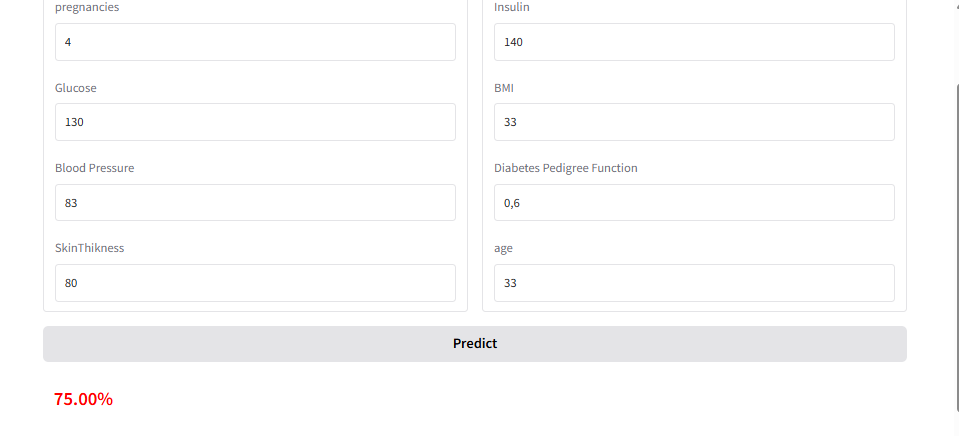

In [37]:
Image.open('example.png')